# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
file_path =r'C:\Users\sriva\Downloads\Module17\data\bank-additional-full.csv' 

In [2]:
df = pd.read_csv(file_path, sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for special values like 'unknown' or other placeholders indicating missing data
special_values = df.apply(lambda x: (x == 'unknown').sum() if x.dtype == 'O' else 0)
print("Special Values:")
print(special_values)

# Check the data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Special Values:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
Data Types:
age                 int64
j

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print('The Business Objective of the task is to develop a predictive model that can accurately classify whether a client will subscribe to a term deposit based on the direct marketing campaign conducted by a Portuguese banking institution. By analyzing various client attributes and previous campaign outcomes, the goal is to optimize the marketing strategy to maximize the effectiveness of future campaigns, thereby increasing the likelihood of successful term deposit subscriptions while minimizing marketing costs and efforts.')

The Business Objective of the task is to develop a predictive model that can accurately classify whether a client will subscribe to a term deposit based on the direct marketing campaign conducted by a Portuguese banking institution. By analyzing various client attributes and previous campaign outcomes, the goal is to optimize the marketing strategy to maximize the effectiveness of future campaigns, thereby increasing the likelihood of successful term deposit subscriptions while minimizing marketing costs and efforts.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Data already loaded into a DataFrame

# Handle missing values
df['job'].replace('unknown', pd.NA, inplace=True)
df['marital'].replace('unknown', pd.NA, inplace=True)
df['education'].replace('unknown', pd.NA, inplace=True)
df['default'].replace('unknown', pd.NA, inplace=True)
df['housing'].replace('unknown', pd.NA, inplace=True)
df['loan'].replace('unknown', pd.NA, inplace=True)

# Encode categorical variables using one-hot encoding or label encoding
# For 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week' and 'poutcome' we'll use one-hot encoding
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Transform target column
# Convert 'y' from categorical to numerical values
label_encoder = LabelEncoder()
df_encoded['y'] = label_encoder.fit_transform(df['y'])

# Now 'df_encoded' contains the transformed features and target column ready for modeling
# X contains the features, and y contains the target variable
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training features and target, respectively,
# while X_test and y_test contain the test features and target, respectively

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
# Calculate the number of instances for each class in the test set
num_yes = sum(y_test == 1)  # Number of 'yes' instances
num_no = sum(y_test == 0)   # Number of 'no' instances

# Predict the majority class for all instances in the test set
baseline_prediction = 1 if num_yes > num_no else 0

# Calculate the accuracy of the baseline prediction
baseline_accuracy = max(num_yes, num_no) / len(y_test)

print("Baseline Accuracy: {:.2f}%".format(baseline_accuracy * 100))

Baseline Accuracy: 88.65%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Logistic Regression Model: {:.2f}%".format(accuracy * 100))

Accuracy of Logistic Regression Model: 90.94%


C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

In [11]:
print('Accuracy of Logistic Regression Model: 90.94%')

Accuracy of Logistic Regression Model: 90.94%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Initialize a list to store results
results = []

# Loop through each model
for model_name, model in models.items():
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate training time
    train_time = time.time() - start_time
    
    # Calculate training accuracy
    train_accuracy = model.score(X_train, y_train)
    
    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.768363        0.909105       0.909444
1                  KNN    0.052651        0.932079       0.901918
2        Decision Tree    0.376730        1.000000       0.885895
3                  SVM   36.077125        0.898452       0.894513


1.24.3


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.0 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.0 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/11.0 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 6.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 6.6 MB/s eta 0:00:02
   ------ ----------------------

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [15]:
# Analyze distribution of target variable
target_distribution = df['y'].value_counts(normalize=True)
print("Target Variable Distribution:")
print(target_distribution)

# Explore features and their distributions
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the feature is categorical
        feature_distribution = df[column].value_counts(normalize=True)
        print(f"\n{column} Distribution:")
        print(feature_distribution)


Target Variable Distribution:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

job Distribution:
job
admin.           0.255079
blue-collar      0.226492
technician       0.165035
services         0.097141
management       0.071565
retired          0.042097
entrepreneur     0.035636
self-employed    0.034779
housemaid        0.025944
unemployed       0.024818
student          0.021416
Name: proportion, dtype: float64

marital Distribution:
marital
married     0.606403
single      0.281405
divorced    0.112192
Name: proportion, dtype: float64

education Distribution:
education
university.degree      0.308386
high.school            0.241149
basic.9y               0.153205
professional.course    0.132879
basic.4y               0.105837
basic.6y               0.058089
illiterate             0.000456
Name: proportion, dtype: float64

default Distribution:
default
no     0.999908
yes    0.000092
Name: proportion, dtype: float64

housing Distribution:
housing
yes    0.536743

In [16]:
# More feature engineering and exploration
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier to analyze feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Analyze feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
print("Feature Importance:")
print(feature_importance)

# Identify redundant or irrelevant features based on feature importance or correlation analysis
# For example, remove features with low importance scores or highly correlated features

# Create new features based on domain knowledge or feature interactions
# For example, combining 'duration' and 'campaign' to create a new feature representing the average duration per campaign
X_train['avg_duration_per_campaign'] = X_train['duration'] / X_train['campaign']
X_test['avg_duration_per_campaign'] = X_test['duration'] / X_test['campaign']

Feature Importance:
age                              8.100727e-02
duration                         2.791960e-01
campaign                         3.887634e-02
pdays                            3.327285e-02
previous                         1.110185e-02
emp.var.rate                     2.097024e-02
cons.price.idx                   2.041981e-02
cons.conf.idx                    2.710870e-02
euribor3m                        1.004713e-01
nr.employed                      5.329085e-02
job_admin.                       1.214504e-02
job_blue-collar                  8.119564e-03
job_entrepreneur                 3.595147e-03
job_housemaid                    3.233733e-03
job_management                   6.566540e-03
job_retired                      5.040044e-03
job_self-employed                4.113918e-03
job_services                     6.121973e-03
job_student                      4.468772e-03
job_technician                   9.951207e-03
job_unemployed                   3.947811e-03
marital_divorc

In [18]:
#Hyperparameter tuning and grid search. 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation accuracy for KNN:", grid_search_knn.best_score_)

# Grid search for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_search_dt.best_score_)

Best parameters for KNN: {'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.907040971168437
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.9134142640364187


In [19]:
#Adjust your performance metric to improve the model
#Chose the F1-score as the performance metric for our KNN model.
from sklearn.metrics import f1_score

# Retrain the KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=11, weights='uniform')
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

print("F1-score for KNN model on the test set:", f1)

F1-score for KNN model on the test set: 0.5187001839362354


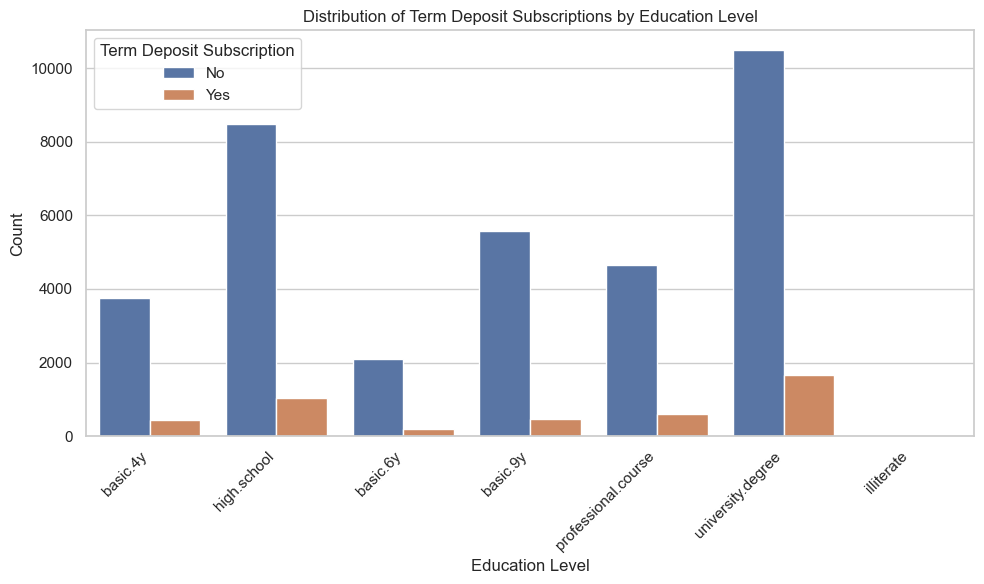

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of 'y' across different education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscription', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

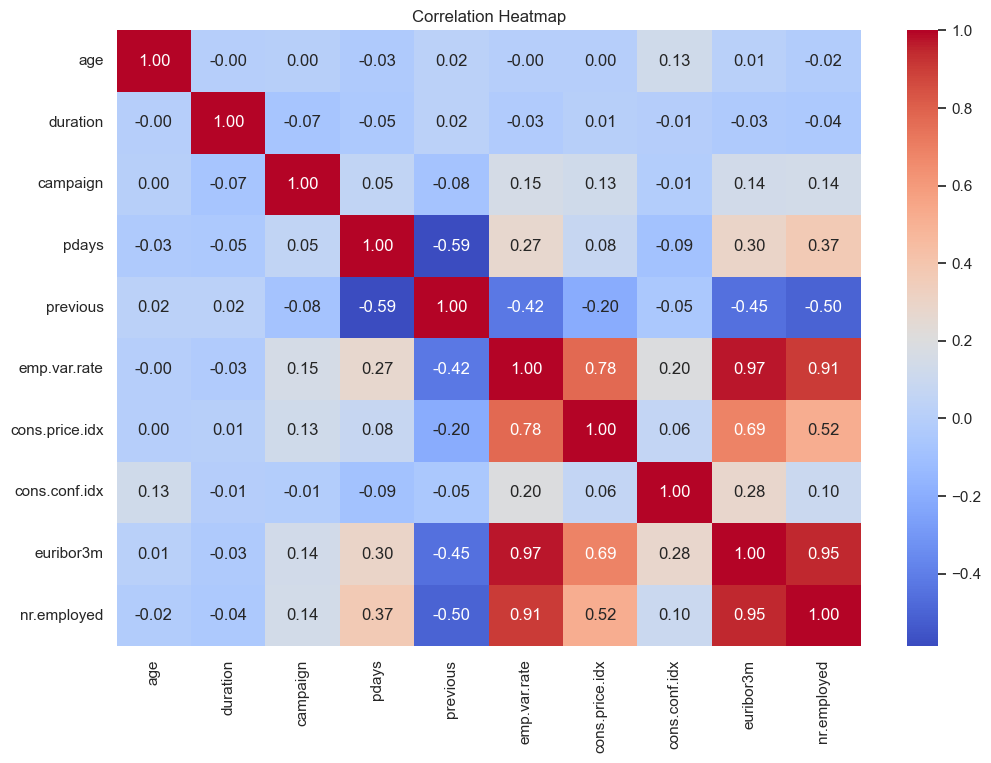

In [24]:
#Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

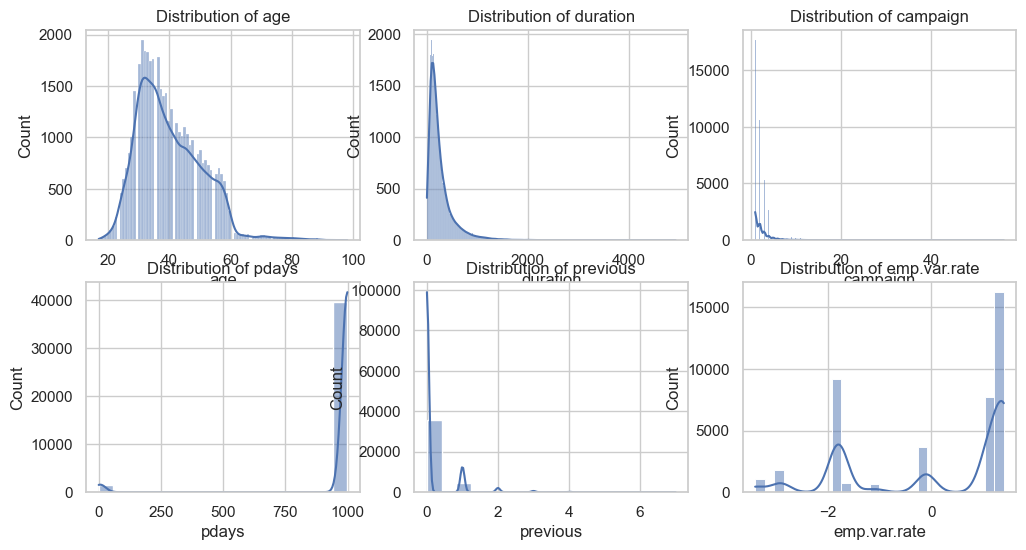

In [25]:
#distribution of numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# pairplot to visualize pairwise relationships between numerical features
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='y', diag_kind='kde')
plt.show()

In [ ]:
#Box plot by target variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Boxplot of {col} by y')
plt.tight_layout()
plt.show()

In [ ]:
#Plot countplots of categorical features to visualize the distribution of each category and its relationship with the target variable.
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Questions